### Подключение библиотек и пакетов

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # для разделения набора данных на train и test
from sklearn.pipeline import make_pipeline # конвейр преобразований одного метода (использование различных модификаций, подгонка метода)
from sklearn.preprocessing import StandardScaler # для нормировки (масштабирования) ввода
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score # проверка обучения модели кросс-валидацией
from sklearn.metrics import r2_score
# from sklearn.metrics import precision_recall_curve # для построения графика для определения влияния порога на оценку

# пакеты для построения кривых (точность, полнота и т.д.)
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score

from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression # МНК (метод наименьших квадратов)

# для визуализации данных
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Настройка pandas

In [2]:
# установка максимального количества столбцов и строк для вывода
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

# установка количества знаков после запятой
pd.set_option("precision", 2)

### Просмотр первичных (сырых) данных

In [3]:
# Чтение данных
df = pd.read_csv("/content/car_price.csv")
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [4]:
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')
print(f'Вывод общей информации по датафрейму и признакам:\n')
print({df.info()})

# Вывод основных статистических характеристик по числовым признакам
df.describe()

Количество строк: 4800
Количество столбцов: 8
Вывод общей информации по датафрейму и признакам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB
{None}


,km,hp,price
count,4800.00,4800.0,4800.00
mean,31912.91,85.0,19722.87
std,35899.45,0.0,4337.52
min,0.00,85.0,5555.00
25%,4700.00,85.0,15990.00
50%,20005.00,85.0,19588.00
75%,47800.00,85.0,22692.50
max,291800.00,85.0,56100.00


Описания признаков:

|Название|Перевод|Тип данных|Тип признака|
|---|---|---|---|
|make_model|Модель|Строка|Категриальный|
|body_type|Тип кузова|Строка|Категориальный|
|Body Color|Цвет кузова|Строка|Категориальный|
|km|Пробег в км.|Число|Количественный|
|hp|Мощность в л.с.|Число|Количественный|
|Gearing Type|Тип КПП|Строка|Категориальный|
|Extras|Дополнительные опции|Строка|Категориальный|
|price|Стоимость|Число|Количественный|

### Предварительная обработка данных  (Data Preprocessing)

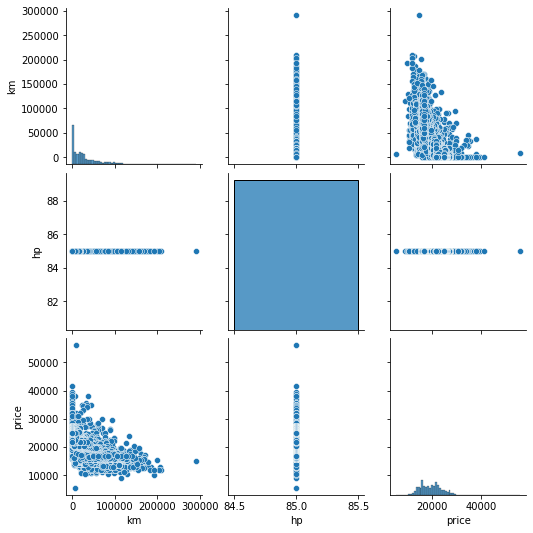

In [5]:
# визуализация зависимости и корреляции между признаками 
sns.pairplot(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB


In [7]:
# вывод всех уникальных значений в признаках с типом object
print(f"Модели автомобилей: {df['make_model'].unique().tolist()}")
print(f"Тип кузова: {df['body_type'].unique().tolist()}")
print(f"Цвет кузова: {df['Body Color'].unique().tolist()}")
print(f"Тип КПП: {df['Gearing Type'].unique().tolist()}")
print(f"Дополнительно: {df['Extras'].unique().tolist()}")

Модели автомобилей: ['Audi A1', 'Audi A2', 'Audi A3']
Тип кузова: ['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Other', 'Off-Road', 'Convertible']
Цвет кузова: ['Black', 'Red', 'Brown', 'White', 'Grey', 'Blue', 'Silver', 'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange']
Тип КПП: ['Automatic', 'Manual', 'Semi-automatic']
Дополнительно: ['Alloy wheels,Catalytic Converter,Voice Control', 'Alloy wheels,Sport seats,Sport suspension,Voice Control', 'Alloy wheels,Voice Control', 'Alloy wheels,Sport seats,Voice Control', 'Alloy wheels,Sport package,Sport suspension,Voice Control', 'Alloy wheels,Sport package,Sport seats,Sport suspension', 'Alloy wheels', 'Alloy wheels,Shift paddles', 'Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control', 'Alloy wheels,Sport seats,Sport suspension', 'Alloy wheels,Sport package,Sport seats', 'Alloy wheels,Sport package', 'Alloy wheels,Catalytic Converter,Shift paddles,Voice Control', 'Alloy wheels,Shift paddles,Sp

In [8]:
# вывод статистики по числовым признакам
df.describe()

,km,hp,price
count,4800.00,4800.0,4800.00
mean,31912.91,85.0,19722.87
std,35899.45,0.0,4337.52
min,0.00,85.0,5555.00
25%,4700.00,85.0,15990.00
50%,20005.00,85.0,19588.00
75%,47800.00,85.0,22692.50
max,291800.00,85.0,56100.00


In [9]:
# вывод статистики по нечисловым признакам
df.describe(include=["object", "bool"])

,make_model,body_type,Body Color,Gearing Type,Extras
count,4800,4800,4800,4800,4800
unique,3,7,13,3,325
top,Audi A3,Sedans,Black,Manual,Alloy wheels
freq,2642,3495,1443,2435,1717


In [10]:
# вывод относительного распределения моделей машин
df["make_model"].value_counts()

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: make_model, dtype: int64

In [11]:
# упрощение модели
# 1. Удалить запись с Audi A2, т.к. имеется всего одна запись с ней
# 2. Удалить колонку признаков Extras, т.к. имеется на первый взгляд очень много категорий по данному признаку. 
#    Можно, конечно, каждую отдельную опцию сделать бинарной и отмечать 1, когда она всречается на признаке Extras, а затем Extras удалить. 
#    Но это можно проверить в будущем

df = df.drop(df[df['make_model'] == 'Audi A2'].index)
df = df.drop(columns=['Extras', 'hp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4799 non-null   object
 1   body_type     4799 non-null   object
 2   Body Color    4799 non-null   object
 3   km            4799 non-null   int64 
 4   Gearing Type  4799 non-null   object
 5   price         4799 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 262.4+ KB


In [12]:
# переименовывание названий признаков
df.columns = ['model', 'body', 'color', 'km', 'transmission', 'price']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         4799 non-null   object
 1   body          4799 non-null   object
 2   color         4799 non-null   object
 3   km            4799 non-null   int64 
 4   transmission  4799 non-null   object
 5   price         4799 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 262.4+ KB


In [13]:
df.groupby("color")['price'].agg([np.mean])

,mean
color,
Beige,17977.13
Black,18926.78
Blue,19486.56
Bronze,18200.00
Brown,17148.43
Green,23116.71
Grey,20841.84
Orange,5555.00
Red,18697.45


In [14]:
df.head()

,model,body,color,km,transmission,price
0,Audi A1,Sedans,Black,56013,Automatic,15770
1,Audi A1,Sedans,Red,80000,Automatic,14500
2,Audi A1,Sedans,Black,83450,Automatic,14640
3,Audi A1,Sedans,Brown,73000,Automatic,14500
4,Audi A1,Sedans,Black,16200,Automatic,16790


In [15]:
# упрощение модели: 
# 1. конвертирование значений у котегориальных признаков в новые бинарные признаки, используя метод one-hot-encoding
df_ohe = pd.get_dummies(data=df, columns=['model','body','color', 'transmission'])
df_ohe 

,km,price,model_Audi A1,model_Audi A3,body_Compact,body_Convertible,body_Coupe,body_Other,body_Sedans,body_Station wagon,color_Beige,color_Black,color_Blue,color_Bronze,color_Brown,color_Green,color_Grey,color_Orange,color_Red,color_Silver,color_Violet,color_White,color_Yellow,transmission_Automatic,transmission_Manual,transmission_Semi-automatic
0,56013,15770,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,80000,14500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,83450,14640,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,73000,14500,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,16200,16790,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,25000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4796,50,24980,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4797,6666,24980,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4798,10,24980,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [16]:
# вывод информации по признакам
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4799
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4799 non-null   int64
 1   price                        4799 non-null   int64
 2   model_Audi A1                4799 non-null   uint8
 3   model_Audi A3                4799 non-null   uint8
 4   body_Compact                 4799 non-null   uint8
 5   body_Convertible             4799 non-null   uint8
 6   body_Coupe                   4799 non-null   uint8
 7   body_Other                   4799 non-null   uint8
 8   body_Sedans                  4799 non-null   uint8
 9   body_Station wagon           4799 non-null   uint8
 10  color_Beige                  4799 non-null   uint8
 11  color_Black                  4799 non-null   uint8
 12  color_Blue                   4799 non-null   uint8
 13  color_Bronze                 4799 non-null   uin

In [17]:
# вывод информации по признакам
df_ohe.describe()

,km,price,model_Audi A1,model_Audi A3,body_Compact,body_Convertible,body_Coupe,body_Other,body_Sedans,body_Station wagon,color_Beige,color_Black,color_Blue,color_Bronze,color_Brown,color_Green,color_Grey,color_Orange,color_Red,color_Silver,color_Violet,color_White,color_Yellow,transmission_Automatic,transmission_Manual,transmission_Semi-automatic
count,4799.00,4799.00,4799.00,4799.00,4799.00,4.80e+03,4.80e+03,4.80e+03,4799.00,4799.00,4.80e+03,4799.00,4799.00,4.80e+03,4.80e+03,4.80e+03,4799.00,4.80e+03,4799.00,4799.00,4.80e+03,4799.00,4.80e+03,4799.00,4799.00,4799.00
mean,31914.11,19721.11,0.45,0.55,0.21,1.46e-03,1.04e-03,4.38e-03,0.73,0.05,3.13e-03,0.30,0.09,4.17e-04,8.75e-03,6.46e-03,0.19,2.08e-04,0.06,0.08,6.25e-04,0.25,5.63e-03,0.44,0.51,0.06
std,35903.10,4336.24,0.50,0.50,0.41,3.82e-02,3.23e-02,6.60e-02,0.44,0.23,5.58e-02,0.46,0.29,2.04e-02,9.32e-02,8.01e-02,0.39,1.44e-02,0.24,0.27,2.50e-02,0.43,7.48e-02,0.50,0.50,0.23
min,0.00,5555.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00
25%,4700.00,15990.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00
50%,20000.00,19588.00,0.00,1.00,0.00,0.00e+00,0.00e+00,0.00e+00,1.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,1.00,0.00
75%,47800.00,22690.00,1.00,1.00,0.00,0.00e+00,0.00e+00,0.00e+00,1.00,0.00,0.00e+00,1.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.50,0.00e+00,1.00,1.00,0.00
max,291800.00,56100.00,1.00,1.00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00,1.00,1.00e+00,1.00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00,1.00e+00,1.00,1.00,1.00e+00,1.00,1.00e+00,1.00,1.00,1.00


In [79]:
# разделение данных на ответы (y) и объекты с описанием признаков (x) 
# y = df_ohe['price']
# x = df_ohe.drop(['price'], axis=1)

In [18]:
# разделение выборок на обучающую и тестовую в соотношении 75/25
df_train, df_test = train_test_split(df_ohe, test_size=0.25, random_state=0)

scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['km', 'price']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,km,price,model_Audi A1,model_Audi A3,body_Compact,body_Convertible,body_Coupe,body_Other,body_Sedans,body_Station wagon,color_Beige,color_Black,color_Blue,color_Bronze,color_Brown,color_Green,color_Grey,color_Orange,color_Red,color_Silver,color_Violet,color_White,color_Yellow,transmission_Automatic,transmission_Manual,transmission_Semi-automatic
2977,1.10e-01,0.15,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3993,5.18e-02,0.24,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3008,1.12e-01,0.56,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3896,3.43e-05,0.29,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4155,6.44e-02,0.25,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [19]:
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,km,price,model_Audi A1,model_Audi A3,body_Compact,body_Convertible,body_Coupe,body_Other,body_Sedans,body_Station wagon,color_Beige,color_Black,color_Blue,color_Bronze,color_Brown,color_Green,color_Grey,color_Orange,color_Red,color_Silver,color_Violet,color_White,color_Yellow,transmission_Automatic,transmission_Manual,transmission_Semi-automatic
4662,4.98e-06,0.53,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
608,2.37e-01,0.22,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2506,4.02e-01,0.32,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1887,4.98e-06,0.49,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3724,8.47e-02,0.46,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [20]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

## Метод наименьших квадратов

In [21]:
# создание и настройка модели линейной регресси с МНК (метод наименьших квадратов)
linreg_least_squares = LinearRegression()

# обучение модели
linreg_least_squares.fit(X_train, y_train)

# точность работы на обучающей выборке
score_least_squares = linreg_least_squares.score(X_train, y_train)
print(f'Точность работы на обучающей выборке: {score_least_squares}')

print(f'Коэффициенты модели: {linreg_least_squares.coef_}')

cross_scores_least_squares = cross_val_score(linreg_least_squares, X_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_least_squares}')

# применение модели на тестовой выборке
y_pred_least_squares = linreg_least_squares.predict(X_test)
y_pred_least_squares

# оценка регрессии
r2_least_squares = r2_score(y_test, y_pred_least_squares)
print(f'Оценка регрессии: {r2_least_squares}')

Точность работы на обучающей выборке: 0.6362155762123343
Коэффициенты модели: [-4.81316768e-01 -6.45685903e+11 -6.45685903e+11  2.01861023e+11
  2.01861023e+11  2.01861023e+11  2.01861023e+11  2.01861023e+11
  2.01861023e+11  6.66860591e+10  6.66860591e+10  6.66860591e+10
 -2.66395864e+09  6.66860591e+10  6.66860591e+10  6.66860591e+10
 -2.98287636e+10  6.66860591e+10  6.66860591e+10  6.66860591e+10
  6.66860591e+10  6.66860591e+10 -5.79501739e+12 -5.79501739e+12
 -5.79501739e+12]
Кросс-валидация: [0.61151521 0.60261013 0.62448028 0.659161   0.63128015]
Оценка регрессии: -8.214181777924962e+20


## Метод опорных векторов

In [23]:
linreg_SVM = make_pipeline(StandardScaler(), LinearSVR(max_iter=1000, random_state=42, tol=1e-5))
linreg_SVM.fit(X_train, y_train)
score_svr = linreg_SVM.score(X_train, y_train)
print(f'Точность работы на обучающей выборке: {score_svr}')

print(f'Коэффициенты модели: {linreg_SVM.named_steps["linearsvr"].coef_}')

cross_scores_svr = cross_val_score(linreg_SVM, X_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_svr}')

# применение модели на тестовой выборке
y_pred_svr = linreg_SVM.predict(X_test)
y_pred_svr

r2_svr = r2_score(y_test, y_pred_svr)
print(f'Оценка регрессии: {r2_svr}')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Точность работы на обучающей выборке: 0.5891898619983718
Коэффициенты модели: [-0.05785856 -0.02269867  0.02269867 -0.00066787  0.00284387 -0.00157045
  0.00060024 -0.00150285  0.00363362 -0.00163316 -0.0027179  -0.00172006
  0.         -0.00279611  0.00483081 -0.0017556   0.         -0.00353063
 -0.0009673   0.00048671  0.00766103  0.00228854  0.00896722 -0.01673393
  0.01718435]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Кросс-валидация: [0.59575107 0.57684469 0.56391962 0.55469976 0.58096745]
Оценка регрессии: -2.7943111437438515


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Метод ближайших соседей

In [24]:
linreg_knn = KNeighborsRegressor(n_neighbors=2)
linreg_knn.fit(X_train, y_train)
score_knn = linreg_knn.score(X_train, y_train)
print(f'Точность работы на обучающей выборке: {score_knn}')

cross_scores_knn = cross_val_score(linreg_SVM, X_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_knn}')

# применение модели на тестовой выборке
y_pred_knn = linreg_knn.predict(X_test)
y_pred_knn

r2_knn = r2_score(y_test, y_pred_knn)
print(f'Оценка регрессии: {r2_knn}')

Точность работы на обучающей выборке: 0.8889087531078123


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Кросс-валидация: [0.59575107 0.57684469 0.56391962 0.55469976 0.58096745]
Оценка регрессии: -2.247004434604652


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
